In [5]:
import os
import re
import statistics
import pandas as pd

In [6]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [7]:
df = pd.read_parquet(os.path.join('data/cnb_sloupce','008.parquet'))

In [8]:
sloupce = ['leader']

In [9]:
for s in sloupce:
    pripojit = pd.read_parquet(os.path.join("data/cnb_sloupce",f"{s}.parquet"))
    df = df.merge(pripojit, left_index=True, right_index=True, how="left")

In [10]:
df = df.explode('008')

In [11]:
df = df[(df["008"].str[15:17] == "xr") & (df["008"].str[35:38] == "cze")]

In [12]:
df = df.explode("leader")

In [13]:
df = df[df["leader"].str[6].isin(["a", "t"])]

In [14]:
df = df[~df["leader"].str[7].isin(["b", "i", "s", " "])]

In [15]:
sloupce = ['245','655','072','100','041','964','080']

In [16]:
for s in sloupce:
    pripojit = pd.read_parquet(os.path.join("data/cnb_sloupce",f"{s}.parquet"))
    df = df.merge(pripojit, left_index=True, right_index=True, how="left")

In [17]:
def najdi_rok(nn8):
    if nn8[6] in ['s', 't', 'd', 'm', 'e', 'c','u', 'r']:
        try:
            return int(nn8[7:11])
        except Exception as e:
            return None
        else:
            return None
    elif nn8[6] == 'q':
        try:
            rok1 = int(nn8[7:11])
            rok2 = int(nn8[11:15])
            if rok2 - rok1 <= 5:
                return int(statistics.median([rok1, rok2]))
            else:
                return None
        except:
            return None
    else:
        return None

In [18]:
def r(x):
    return x.groupby('rok').size().plot.bar(figsize=(25,5))

In [19]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [20]:
df = df.dropna(subset=["rok"])

In [21]:
df['rok']

001
ck8300078         1982.0
ck8300080         1983.0
ck8300081         1982.0
ck8300082         1981.0
ck8300083         1982.0
                   ...  
nkc20243632921    2024.0
nkc20243632922    2024.0
nkc20243632923    2024.0
nkc20243632924    2024.0
cpk20243632941    1953.0
Name: rok, Length: 881825, dtype: float64

In [22]:
df = df.dropna(subset=['245_a','100_a'])
df['titul'] = df['245_a'].apply(lambda x: x[:-1].strip() if x[-1] in [':','/',';','=','.'] else x.strip())

In [23]:
df = df.sort_values(by="rok")

In [24]:
df[df['100_7'].astype(str).str.contains('jk01072915',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,080_a,080_2,080_x,080_9,080_ind1,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20041417516,040923s1836 xr e 000 p cze,nam a22 a 4500,1,0,Mág :,báseň od Karla Hynka Máchy,None,None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[821.162.3-1],[MRF],None,None,None,1836.0,Mág
cpk20051497973,050128s1845 xr e 000 macze,nam a22 a 4500,1,0,Básně.,None,[napsal Karel Hynek Mácha],[Díl první /],None,None,None,None,None,"[7, 7, 7, 7, 7]","[česká poezie, studie, deníky, korespondence, ...","[fd133958, fd133597, fd132006, fd132681, fd133...","[czenas, czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[929, 821.162.3-051, 821.162.3-1, (048.8), (09...","[MRF, MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,1845.0,Básně
cpk20142538381,140106s1857 xr ||| | cze,nam a22 a 4500,1,0,Cikáni /,None,román z pozůstalých spisů Karla Hynka Máchy,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1857.0,Cikáni
cpk20132508470,131021s1862 xr e 000 p cze,nam a22 aa4500,1,0,Spisy Karla Hynka Máchy,None,None,None,None,None,None,None,None,"[7, 7, 7]","[poezie, české romány, české povídky]","[fd131936, fd133974, fd133971]","[czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-31, 821.162.3-32, (0:82-31), (0:82-...","[MRF, MRF, MRF, MRF]",None,None,None,1862.0,Spisy Karla Hynka Máchy
cpk20040315951,040512q18651866xr a e 000 p cze,nam a22 a 4500,1,0,Máj /,None,báseň romantická od Karla Hynka Máchy ; illust...,None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (0:82-1)]","[MRF, MRF]",None,None,None,1865.0,Máj
nkc20081815810,080814s1869 xr e 000 j cze,nam a22 a 4500,1,0,Cikáni /,None,K.H. Mácha ... ; [autografoval Adolf Hanel],None,None,None,None,None,None,[7],[české prózy],[fd133972],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,None,1869.0,Cikáni
nkc20081815811,080814s1869 xr e 000 p cze,nam a22 a 4500,1,0,Spisy K.H. Máchy /,None,... [autografoval Adolf Hanel],None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (0:82-1)]","[MRF, MRF]",None,None,None,1869.0,Spisy K.H. Máchy
cpk20021037313,020117s1872 xr a e 000 p cze,nam a22 a 4500,1,0,Máj :,báseň romantická od Karla Hynka Máchy /,ilustroval Jos. Scheiwl ; ryl J.F. Patočka,None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,

In [25]:
df[df['titul'] == 'Šokovaná růže']

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,080_a,080_2,080_x,080_9,080_ind1,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk196904868,971206s1969 xr ||| | cze,nam a22 1 4500,1,0,Šokovaná růže /,None,Oldřich Mikulášek,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Mikulášek, Oldřich,",jk01081628,[aut],1910-1985,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[885-14],[undef],None,None,None,1969.0,Šokovaná růže
bk197002645,970502s1970 xr ||| | cze,nam a22 1 4500,1,0,Šokovaná růže /,None,Oldřich Mikulášek,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Mikulášek, Oldřich,",jk01081628,[aut],1910-1985,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[885-14],[undef],None,None,None,1970.0,Šokovaná růže


In [26]:
df[df['072_x'].astype(str).str.lower().str.lower().str.contains('verše',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,080_a,080_2,080_x,080_9,080_ind1,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [27]:
df[df['072_x'].astype(str).str.lower().str.contains('česká poezie',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,080_a,080_2,080_x,080_9,080_ind1,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20051527410,050317s1802 xr e 000 pdcze,nam a22 a 4500,1,0,"Pjseň Pánu, Panu Jozefowi Wimmrowi, Wlastency ...",na důkaz wážnosti a ssetrnosti obětowána od F....,None,None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],0,"S...a, F.",None,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[821.162.3-1],[MRF],None,None,None,1802.0,"Pjseň Pánu, Panu Jozefowi Wimmrowi, Wlastency ..."
bknvla04792,041025s1802 xr e 000 p cze,nam a22 1i 4500,1,0,Nowé básně.,None,wydané od Antonjna Puchmayera,[Swazek prwnj /],None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Puchmajer, Antonín Jaroslav,",jk01101689,[aut],1769-1820,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (0:82-1)]","[MRF, MRF]",None,None,None,1802.0,Nowé básně
nkc20061639418,060123s1803 xr e 000 p cze,nam a22 a 4500,1,0,Spěw Kwerků Kuttnohorských wzbuzugicý k pawowá...,cýsařsko-králowskému Hornjmu Auřadu obětowaný ...,složený od Frantisska Wawáka ; a w hudbu čtyřh...,None,None,None,None,None,None,"[7, 7]","[česká poezie, jubilejní publikace]","[fd133958, fd131839]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Vavák, František Jan,",jk01141705,[aut],1741-1816,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (437.312), (082.2)]","[MRF, MRF, MRF]",None,None,None,1803.0,Spěw Kwerků Kuttnohorských wzbuzugicý k pawowá...
cpk20051500789,050222s1804 xr e 000 pdcze,nam a22 a 4500,1,0,[Přehrozné se mračno hnalo ... /,None,František Jan Tomsa],None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Tomsa, František Jan,",jk01132744,[aut],1753-1814,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, 929.7-055.2, (437.3)]","[MRF, MRF, MRF]",None,None,None,1804.0,[Přehrozné se mračno hnalo ...
bknhak08849,030503s1804 xr e 000 p cze,nam a22 1 4500,1,0,Poslednj Saud /,None,složený od Wogtěcha Negedlého,None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Nejedlý, Vojtěch,",jk01082969,[aut],1772-1844,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (0:82-1)]","[MRF, MRF]",None,None,None,1804.0,Poslednj Saud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20243603307,240426s2024 xr a g 000 p cze,nam a22 i 4500,1,0,Každý má co říct /,None,"Anežka Popelová, Tomáš Halata, Klára Vyvialová...",None,None,None,None,None,None,"[7, 7, 9, 9]","[česká poezie, fotografické publikace, Czech p...","[fd133958, fd132276, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Popelová, Anežka",None,"[aut, pht]",None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, 808.1-053.2, (437.326), (0:82-1)...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,2024.0,Každý má co říct
nkc20243603296,240425s2024 xr a g 000 p cze,nam a22 i 4500,1,0,Na lačný srce - Suché sny ryb /,None,Roman Krištof ; ilustrace Frída K

In [28]:
ceska_poezie = df[
    df['072_x'].astype(str).str.lower().str.contains('česká poezie',na=False)
    | df['072_a'].astype(str).str.lower().str.contains('821.162.3-1',na=False)
    | df['080_a'].astype(str).str.contains('821.162.3-1',na=False)
    | df['080_a'].astype(str).str.contains('885-14',na=False)
    | df['655_a'].astype(str).str.lower().str.contains('česká poezie', na=False)
    
]
ceska_poezie = ceska_poezie[ceska_poezie['100_a'].notnull()]
ceska_poezie['autorstvo'] = ceska_poezie['100_a'].apply(lambda x: x.replace(',','') if x != None else None)
ceska_poezie2 = ceska_poezie.sort_values(by='rok').drop_duplicates(subset=['titul','autorstvo'], keep='first')

In [29]:
ceska_poezie2[ceska_poezie2['rok'] < 1915][['rok','titul','autorstvo']].sample(20)

,rok,titul,autorstvo
001,,,
bknvsv09485,1880.0,Básně,Stašek Antal
bknzdr00920,1888.0,Františka Ladislava Čelakovského Růže stolistá,Čelakovský František Ladislav
bknjaj17594,1876.0,Kalendářík lidstva,Neruda Jan
bknaus00100,1907.0,Rok na vsi,Beneš Vojta
cpk20041298557,1900.0,Fantastické povídky,Leger Karel
cpk20030174472,1896.0,Trosky,Sutnar Jaroslav
nos190244918,1902.0,Balada o jednom člověku a jeho radostech,Sova Antonín
cpk20021195516,1849.0,"Dwanáctý čerwen, aneb, Wýstraha Čechům!",Sekavec Jan
cpk20021088730,1883.0,Adama Chlumeckého Apokalypse otroků,Chlumecký Adam


In [30]:
df[df['245_a'].astype(str).str.contains('Šokovaná růže')]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,080_a,080_2,080_x,080_9,080_ind1,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk196904868,971206s1969 xr ||| | cze,nam a22 1 4500,1,0,Šokovaná růže /,None,Oldřich Mikulášek,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Mikulášek, Oldřich,",jk01081628,[aut],1910-1985,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[885-14],[undef],None,None,None,1969.0,Šokovaná růže
bk197002645,970502s1970 xr ||| | cze,nam a22 1 4500,1,0,Šokovaná růže /,None,Oldřich Mikulášek,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Mikulášek, Oldřich,",jk01081628,[aut],1910-1985,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[885-14],[undef],None,None,None,1970.0,Šokovaná růže


In [31]:
ceska_poezie2[ceska_poezie2['autorstvo'] == 'Skácel Jan'][['rok','titul','autorstvo']]

,rok,titul,autorstvo
001,,,
bk515500222,1955.0,Kaštany padají,Skácel Jan
bk195703911,1957.0,Kolik příležitostí má růže,Skácel Jan
bk196003510,1960.0,Co zbylo z anděla,Skácel Jan
bk196101204,1961.0,Jak šel brousek na vandr,Skácel Jan
bk196101329,1961.0,Pohádka o velikém samovaru,Skácel Jan
bk196204607,1962.0,Hodina mezi psem a vlkem,Skácel Jan
bk196500660,1964.0,Návraty,Skácel Jan
bk196503453,1965.0,Smuténka,Skácel Jan
bk196605103,1966.0,Český brevíř lásky,Skácel Jan


In [32]:
ceska_poezie2[ceska_poezie2['autorstvo'] == 'Mikulášek Oldřich'][['rok','titul','autorstvo']]

,rok,titul,autorstvo
001,,,
bk194002378,1940.0,Marné milování,Mikulášek Oldřich
bk515500200,1955.0,Divoké kačeny,Mikulášek Oldřich
bk195703907,1957.0,Krajem táhne prašivec,Mikulášek Oldřich
cpk20132499416,1958.0,Taneční fantasie,Mikulášek Oldřich
bk196000331,1959.0,Běžící luna,Mikulášek Oldřich
bk195906151,1959.0,První obrázky,Mikulášek Oldřich
bk195902679,1959.0,Ortely a milosti,Mikulášek Oldřich
bk196002591,1960.0,Orchestr v korunách,Mikulášek Oldřich
bk196303817,1963.0,Svlékání hadů,Mikulášek Oldřich


In [33]:
ceska_poezie2[['rok','titul','autorstvo']].sample(20)

,rok,titul,autorstvo
001,,,
nkc20172906133,2016.0,Ulétlé ptákoviny,Bláha Zdenek
nkc20102118895,2010.0,Ozvěny ticha,Kostruhová Petra
nkc20081801999,2007.0,To byla doba,Novotný Michal
nkc20091997559,2009.0,Od Andulky po Žížalu,Kšajtová Marie
cpk20021181359,1892.0,Život a smrt,Vrchlický Jaroslav
nkc20162786225,2016.0,Čas v čase,Ďurďák Jan
nkc20193136423,2019.0,Každá věc má něco společného se štěstím,Borkovec Petr
nkc20102154091,2010.0,V krátkých řádkách o zvířátkách,Oliva Stanislav
nkc20071783311,1863.0,Laskavý dárek,Doucha František


<Axes: xlabel='rok'>

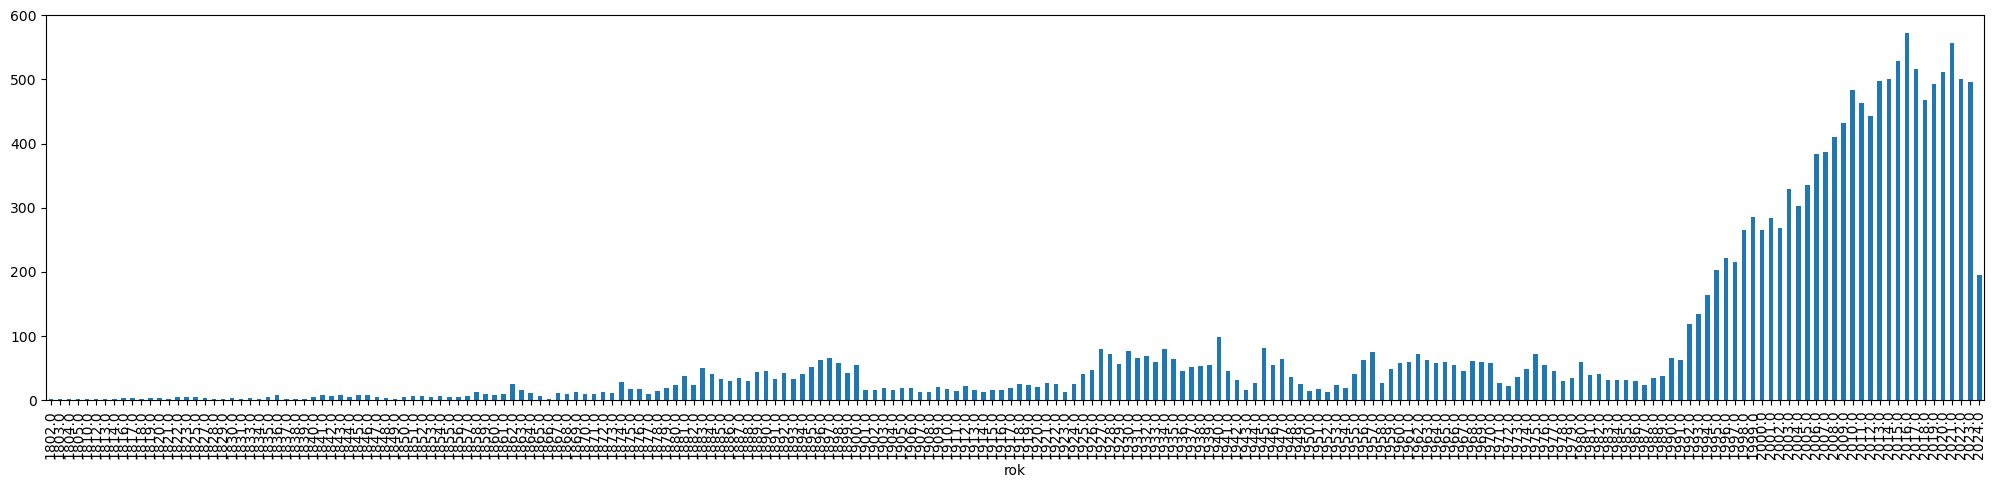

In [34]:
r(ceska_poezie2)

In [35]:
len(ceska_poezie2)

17214

In [36]:
ceska_poezie2[['rok','titul','autorstvo','100_7']].to_parquet(os.path.join("data","cnb_ceska_poezie.parquet"))